# Importing Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder, StandardScaler , PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier ,VotingClassifier , AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score , accuracy_score 
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
%matplotlib inline


# Loading and Exploring Data

## Loading Data

In [3]:
Cardio_dataset=(
    pd.read_csv(r"C:\Users\Administrator\Desktop\my_lab\CVD dataset\cardio_train.csv" , sep=";")
)
Cardio_dataset=Cardio_dataset[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]
Cardio_dataset.shape

(70000, 12)

## EDA

In [4]:
Cardio_dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
Cardio_dataset.info()
# no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [6]:
Cardio_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [7]:
Cardio_dataset.drop_duplicates(keep="first",inplace=True) 

In [8]:
Cardio_dataset.shape

(69976, 12)

### Data Visualization

#### plotting numerical columns 

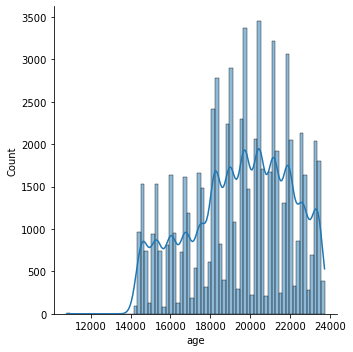

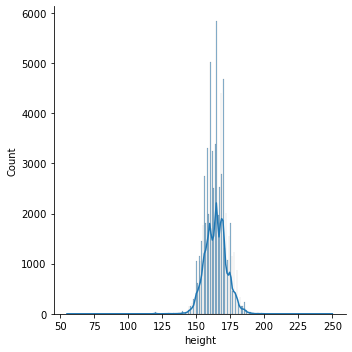

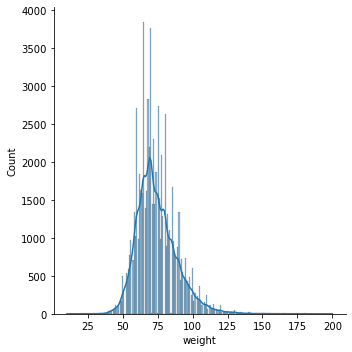

In [9]:
def plot_numerical_col (dataset , var):
    return sns.displot(data=dataset , x=var , kde=True)
numeric_columns=['age' , 'height' , 'weight']
for col in numeric_columns:
    plot_numerical_col(Cardio_dataset , col)

Before I feed the dataset into the model, it is essential to clean the diastolic and systolic datasets because the min and max values based on the described table is an outliers and should be removed and checked the value. 
First, I show them by boxplot and then remove the outliers.

<AxesSubplot:xlabel='ap_hi', ylabel='ap_lo'>

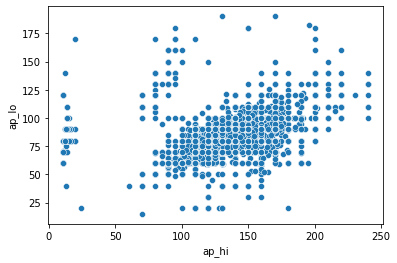

In [10]:
sns.scatterplot(data = Cardio_dataset[(Cardio_dataset["ap_hi"] < 400) & (Cardio_dataset["ap_lo"] < 400) & (Cardio_dataset["ap_hi"] > 10) & (Cardio_dataset["ap_lo"] > 10)], x = "ap_hi", y = "ap_lo")

In [11]:
Cardio_dataset["pulsus_reversus"]= Cardio_dataset['ap_hi'] < Cardio_dataset['ap_lo']
Cardio_dataset.pulsus_reversus.value_counts()

False    68742
True      1234
Name: pulsus_reversus, dtype: int64

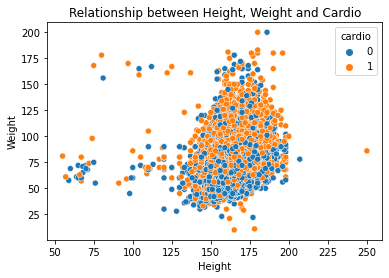

In [12]:
# Outlier Detection and Relationship
sns.scatterplot(y=Cardio_dataset['weight'],x=Cardio_dataset['height'],hue=Cardio_dataset['cardio'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Relationship between Height, Weight and Cardio')
plt.show()

#### Correlation matrix

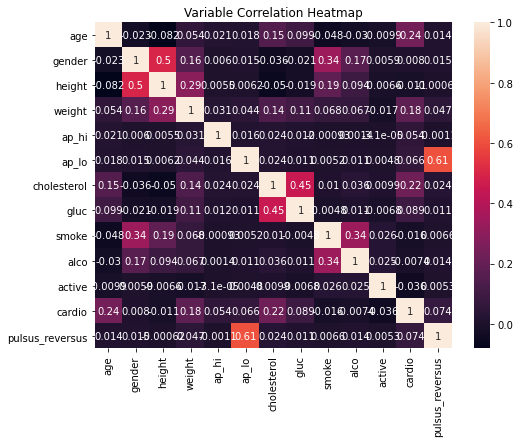

In [13]:
correlation_matrix = Cardio_dataset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Variable Correlation Heatmap')
plt.show()

#### plotting categorical columns

Using the map method to change numerical values to categorical ones can make your bar chart clearer and more interpretable. 

In [14]:
Cardio_dataset["gender"]=Cardio_dataset["gender"].map({1:'Man' , 2:'Woman'})
Cardio_dataset["cholesterol"]=Cardio_dataset["cholesterol"].map({1:"normal" , 2:"above normal" , 3:"well above normal"})
Cardio_dataset["gluc"]=Cardio_dataset["gluc"].map({1:"normal" , 2:"above normal" , 3:"well above normal"})
Cardio_dataset["smoke"]=Cardio_dataset["smoke"].map({0:"no" , 1:"yes"})
Cardio_dataset["alco"]=Cardio_dataset["alco"].map({0:"no" , 1:"yes"})
Cardio_dataset["active"]=Cardio_dataset["active"].map({0:"no" , 1:"yes"})

<AxesSubplot:xlabel='variable', ylabel='count'>

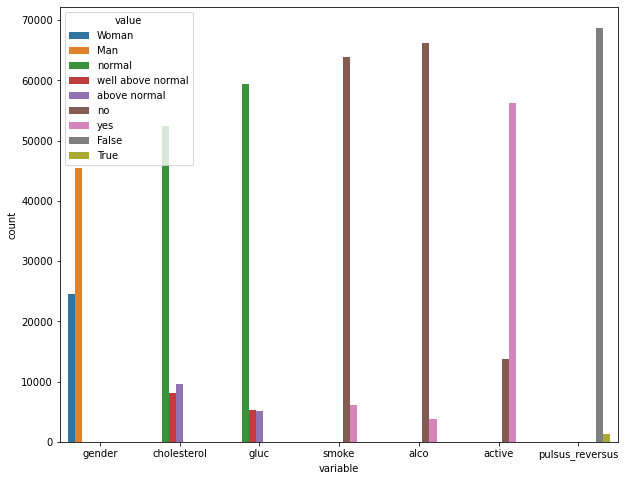

In [15]:
categorical_var_=Cardio_dataset.loc[: , ['gender','cholesterol', 'gluc', 'smoke', 'alco', 'active' ,'pulsus_reversus']]
plt.figure(figsize=(10,8))
sns.countplot(x="variable", hue="value",data= pd.melt(categorical_var_))

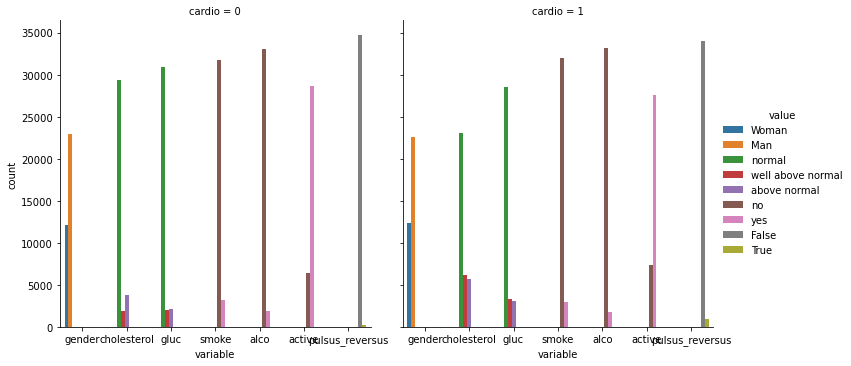

In [16]:
sns.catplot(data=Cardio_dataset.melt(id_vars='cardio', value_vars=['gender','cholesterol', 'gluc', 'smoke', 'alco', 'active' ,'pulsus_reversus']), x="variable", hue="value", col="cardio", kind="count")

# Data Preprocessing

## Removing outlier

In [17]:
def remove_outlier(dataset , var):
       return dataset[(dataset[var] >= 10) & (dataset[var] <= 400)] 
    
Cardio_dataset=remove_outlier(Cardio_dataset, 'ap_lo')
Cardio_dataset=remove_outlier(Cardio_dataset, 'ap_hi')


def remove_outlier_height (dataset , height):
     return dataset[(dataset[height] >= 75) & (dataset[var] <= 250)]

Cardio_dataset=remove_outlier(Cardio_dataset, 'height')

    
def remove_outlier_weight(dataset , weight):
    return dataset[(dataset[var] >= 25) & (dataset[var] <= 300)]
Cardio_dataset=remove_outlier(Cardio_dataset, 'weight')


In [18]:
Cardio_dataset.shape

(68952, 13)

In [19]:
Cardio_dataset.pulsus_reversus.value_counts()

False    68679
True       273
Name: pulsus_reversus, dtype: int64

## Adding New Features

In [20]:
def calculate_bmi(dataset , weight, height):
    height_m = dataset[height]/100
    bmi = dataset[weight] / (height_m ** 2)
    return bmi

Cardio_dataset["bmi"]=calculate_bmi(Cardio_dataset , "weight", "height")


def calculate_blood_pressure(dataset, systolic , diastolic):
    return dataset[systolic]/dataset[diastolic]

Cardio_dataset["BP"]=calculate_blood_pressure(Cardio_dataset ,"ap_hi" , "ap_lo" )

def Pulsus_reversus(dataset, systolic , diastolic):
    
    return Cardio_dataset[systolic] < Cardio_dataset[diastolic]

Cardio_dataset['Pulsus_reversus']=Pulsus_reversus(Cardio_dataset ,'ap_hi' , 'ap_lo' )

# change the age feature from days to the year

def days_to_year(dataset , col):
    return round(dataset[col]/365 , 2)
Cardio_dataset["Age"]=days_to_year(Cardio_dataset , "age")

## Split_test_train

In [21]:
Cardio_dataset["cardio"].value_counts(normalize=True) * 100

0    50.497447
1    49.502553
Name: cardio, dtype: float64

In [22]:
y=Cardio_dataset["cardio"]
X=Cardio_dataset.drop('cardio' , axis=1)
X_train ,  X_test ,y_train, y_test=train_test_split(X , y, test_size=0.2 , random_state=42)
X_train.shape

(55161, 16)

## ColumnTransformer

In [23]:
number_list=Cardio_dataset[['age', 'height', 'weight', 'ap_hi', 'ap_lo','bmi', 'BP', 'Age']]
list_number=list(number_list)
list_cat_ordinal=list(["cholesterol", "gluc"])
list_cat_binary=list(["gender" , "smoke" , "alco" , "active"])

coltransform=ColumnTransformer([
    ('std' , StandardScaler() , list_number), 
    ('ordinal' ,OrdinalEncoder() , list_cat_ordinal ), 
    ('1hot' , OneHotEncoder() , list_cat_binary)
    
])
X_train_pre=coltransform.fit_transform(X_train)

# Model_Building

In [24]:
lr=LogisticRegression(max_iter=100)
rf=RandomForestClassifier(n_estimators=51,max_depth=10)
xgb= XGBClassifier(n_estimators=150,gamma= 0.24, max_depth=4, learning_rate=0.13,reg_lambda=50.0, scale_pos_weight=1)
knn=KNeighborsClassifier(weights = 'uniform', n_neighbors = 300,leaf_size = 1)

models=[lr , rf, xgb ,knn]
for  model in models:
    model.fit(X_train_pre , y_train)
    y_pred=cross_val_predict(model , X_train_pre , y_train , cv=5)
    precision=precision_score(y_train,y_pred)
    recall=recall_score(y_train,y_pred)
    print(f'Model :{model.__class__.__name__}')
    print(f'Precisio score : {precision}')
    print(f'Recall score : {recall}')
    print('-----------------------------')

Model :LogisticRegression
Precisio score : 0.7407526925093784
Recall score : 0.6732658747616953
-----------------------------
Model :RandomForestClassifier
Precisio score : 0.750999360409338
Recall score : 0.6887740137850125
-----------------------------
Model :XGBClassifier
Precisio score : 0.7540575285232203
Recall score : 0.6881507552427042
-----------------------------
Model :KNeighborsClassifier
Precisio score : 0.7719004524886878
Recall score : 0.6254216160727379
-----------------------------


In [26]:
y_probs = cross_val_predict(xgb, X_train_pre , y_train, cv=5, method='predict_proba')[:, 1]

threshold = 0.3 

y_pred_ = (y_probs >= threshold).astype(int)

recall = recall_score(y_train, y_pred_)
precision = precision_score(y_train, y_pred_)
confusionmatrix=confusion_matrix(y_train, y_pred_)
accuracy = accuracy_score(y_train  , y_pred_)                                  
print(f"confusion matrix:")
print(confusionmatrix)
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"accuracy: {accuracy}")

confusion matrix:
[[13586 14299]
 [ 3333 23943]]
Recall: 0.8778046634403871
Precision: 0.6260917316039956
accuracy: 0.6803538732075198


In [34]:
X_test_pre = coltransform.transform(X_test)
y_prob_test = xgb.predict_proba(X_test_pre)[:, 1]
y_pred_test= (y_prob_test >= threshold).astype(int)

(13791,)

In [37]:
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
print(f"Accuracy:{accuracy_test}")
print(f"Precision:{ precision_test}")
print(f"Recall:{recall_test}")

Accuracy:0.6836342542237691
Precision:0.6297606659729449
Recall:0.8826017208691848
